In [1]:
import pandas as pd
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/online_raw.csv')
print('Shape dataset:', dataset.shape)
print('\nLima data teratas:\n', dataset.head())
print('\nInformasi dataset:')
print(dataset.info())
print('\nStatistik deskriptif:\n', dataset.describe())

Shape dataset: (12330, 18)

Lima data teratas:
    Administrative  Administrative_Duration  Informational  \
0             0.0                      0.0            0.0   
1             0.0                      0.0            0.0   
2             0.0                     -1.0            0.0   
3             0.0                      0.0            0.0   
4             0.0                      0.0            0.0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0             1.0                 0.000000   
1                     0.0             2.0                64.000000   
2                    -1.0             1.0                -1.000000   
3                     0.0             2.0                 2.666667   
4                     0.0            10.0               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         

In [2]:
dataset_corr = dataset.corr()
print('Korelasi dataset:\n', dataset.corr())
print('Distribusi Label (Revenue):\n', dataset['Revenue'].value_counts())
# Tugas praktek
print('\nKorelasi BounceRates-ExitRates: ', dataset_corr.loc['BounceRates','ExitRates'])
print('\nKorelasi Revenue-PageValues: ', dataset_corr.loc['Revenue','PageValues'])
print('\nKorelasi TrafficType-Weekend: ', dataset_corr.loc['TrafficType','Weekend'])

Korelasi dataset:
                          Administrative  Administrative_Duration  \
Administrative                 1.000000                 0.601466   
Administrative_Duration        0.601466                 1.000000   
Informational                  0.376782                 0.302647   
Informational_Duration         0.255757                 0.237959   
ProductRelated                 0.430832                 0.288869   
ProductRelated_Duration        0.373647                 0.355238   
BounceRates                   -0.223474                -0.144128   
ExitRates                     -0.316192                -0.205618   
PageValues                     0.098771                 0.067463   
SpecialDay                    -0.095054                -0.073472   
OperatingSystems              -0.006459                -0.007425   
Browser                       -0.025243                -0.015525   
Region                        -0.005680                -0.005681   
TrafficType                  

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
# checking the Distribution of customers on Revenue
plt.rcParams['figure.figsize'] = (12,5)
plt.subplot(1, 2, 1)
sns.countplot(dataset['Revenue'], palette = 'pastel')
plt.title('Buy or Not', fontsize = 20)
plt.xlabel('Revenue or not', fontsize = 14)
plt.ylabel('count', fontsize=14)
# checking the Distribution of customers on Weekend
plt.subplot(1, 2, 2)
sns.countplot(dataset['Weekend'], palette = 'inferno')
plt.title('Purchase on Weekends', fontsize = 20)
plt.xlabel('Weekend or not', fontsize = 14)
plt.ylabel('count', fontsize = 14)
plt.show()

C:\Users\201802050007\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\201802050007\AppData\Roaming\Python\Python36\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<Figure size 1200x500 with 2 Axes>

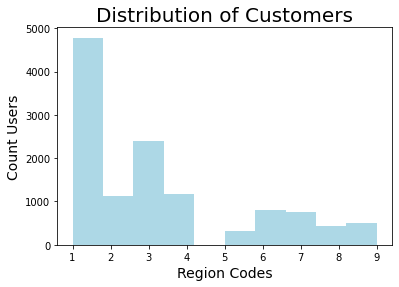

In [4]:
import matplotlib.pyplot as plt
# visualizing the distribution of customers around the Region
plt.hist(dataset['Region'], color = 'lightblue')
plt.title('Distribution of Customers', fontsize = 20)
plt.xlabel('Region Codes', fontsize = 14)
plt.ylabel('Count Users', fontsize = 14)
plt.show()

In [5]:
#checking missing value for each feature  
print('Checking missing value for each feature:')
print(dataset.isnull().sum())
#Counting total missing value
print('\nCounting total missing value:')
print(dataset.isnull().sum().sum())

Checking missing value for each feature:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

Counting total missing value:
112


In [6]:
#Drop rows with missing value   
dataset_clean = dataset.dropna()  
print('Ukuran dataset_clean:', dataset_clean.shape) 

Ukuran dataset_clean: (12316, 18)


In [7]:
print("Before imputation:")
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with mean of feature value  
dataset.fillna(dataset.mean(), inplace = True)
# Checking missing value for each feature  
print(dataset.isnull().sum())
# Counting total missing value  
print(dataset.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

In [8]:
import pandas as pd
dataset1 = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/online_raw.csv')

print("Before imputation:")
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

print("\nAfter imputation:")
# Fill missing value with median of feature value  
dataset1.fillna(dataset1.median(), inplace = True)
# Checking missing value for each feature  
print(dataset1.isnull().sum())
# Counting total missing value  
print(dataset1.isnull().sum().sum())

Before imputation:
Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64
112

After imputation:
Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0

In [9]:
from sklearn.preprocessing import MinMaxScaler  
#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
#list all the feature that need to be scaled  
scaling_column = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','ProductRelated_Duration','BounceRates','ExitRates','PageValues']
#Apply fit_transfrom to scale selected feature  
dataset[scaling_column] = scaler.fit_transform(dataset[scaling_column])
#Cheking min and max value of the scaling_column
print(dataset[scaling_column].describe().T[['min','max']])

                         min  max
Administrative           0.0  1.0
Administrative_Duration  0.0  1.0
Informational            0.0  1.0
Informational_Duration   0.0  1.0
ProductRelated           0.0  1.0
ProductRelated_Duration  0.0  1.0
BounceRates              0.0  1.0
ExitRates                0.0  1.0
PageValues               0.0  1.0


In [10]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
# Convert feature/column 'Month'
LE = LabelEncoder()
dataset['Month'] = LE.fit_transform(dataset['Month'])
print(LE.classes_)
print(np.sort(dataset['Month'].unique()))
print('')

# Convert feature/column 'VisitorType'
LE = LabelEncoder()
dataset['VisitorType'] = LE.fit_transform(dataset['VisitorType'])
print(LE.classes_)
print(np.sort(dataset['VisitorType'].unique()))

['Aug' 'Dec' 'Feb' 'Jul' 'June' 'Mar' 'May' 'Nov' 'Oct' 'Sep']
[0 1 2 3 4 5 6 7 8 9]

['New_Visitor' 'Other' 'Returning_Visitor']
[0 1 2]


# Pembuatan Model

In [11]:
# removing the target column Revenue from dataset and assigning to X
X = dataset.drop(['Revenue'], axis = 1)
# assigning the target column Revenue to y
y = dataset['Revenue']
# checking the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (12330, 17)
Shape of y: (12330,)


In [12]:
from sklearn.model_selection import train_test_split
# splitting the X, and y
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
# checking the shapes
print("Shape of X_train :", X_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of X_test :", X_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of X_train : (9864, 17)
Shape of y_train : (9864,)
Shape of X_test : (2466, 17)
Shape of y_test : (2466,)


In [13]:
from sklearn.tree import DecisionTreeClassifier
# Call the classifier
model = DecisionTreeClassifier()
# Fit the classifier to the training data
model = model.fit(X_train,y_train)

In [14]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [15]:
# Apply the classifier/model to the test data
y_pred = model.predict(X_test)
print(y_pred.shape)

(2466,)


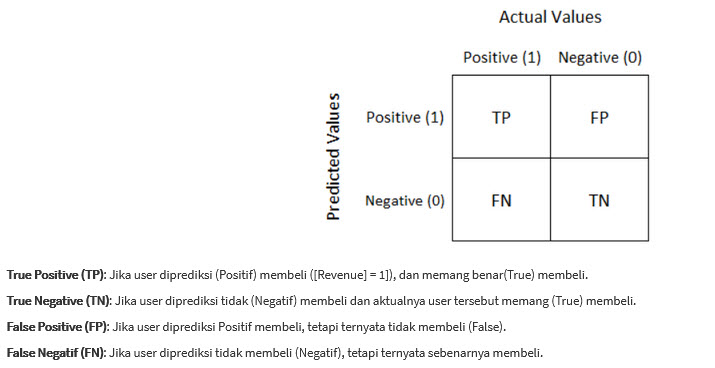

Berdasarkan confusion matrix, dapat mengukur metrik - metrik berikut :

- Accuracy = (TP + TN ) / (TP+FP+FN+TN)
- Precision = (TP) / (TP+FP)
- Recall = (TP) / (TP + FN)
- F1 Score = 2 * (Recall*Precission) / (Recall + Precission)

Tidak perlu menghitung nilai ini secara manual. Cukup gunakan  fungsi classification_report() untuk memunculkan hasil perhitungan metrik - metrik tersebut.

In [16]:
from sklearn.metrics import confusion_matrix, classification_report

# evaluating the model
print('Training Accuracy :', model.score(X_train, y_train))
print('Testing Accuracy :', model.score(X_test, y_test))

# confusion matrix
print('\nConfusion matrix:')
cm = confusion_matrix(y_test, y_pred)
print(cm)

# classification report
print('\nClassification report:')
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.8576642335766423

Confusion matrix:
[[1885  159]
 [ 192  230]]

Classification report:
              precision    recall  f1-score   support

       False       0.91      0.92      0.91      2044
        True       0.59      0.55      0.57       422

   micro avg       0.86      0.86      0.86      2466
   macro avg       0.75      0.73      0.74      2466
weighted avg       0.85      0.86      0.86      2466



Pakai Metrik yang Mana?

Jika dataset memiliki jumlah data False Negatif dan False Positif yang seimbang (Symmetric), maka bisa gunakan Accuracy, tetapi jika tidak seimbang, maka sebaiknya menggunakan F1-Score.

Dalam suatu problem, jika lebih memilih False Positif lebih baik terjadi daripada False Negatif, misalnya: Dalam kasus Fraud/Scam, kecenderungan model mendeteksi transaksi sebagai fraud walaupun kenyataannya bukan, dianggap lebih baik, daripada transaksi tersebut tidak terdeteksi sebagai fraud tetapi ternyata fraud. Untuk problem ini sebaiknya menggunakan Recall.

Sebaliknya, jika lebih menginginkan terjadinya True Negatif dan sangat tidak menginginkan terjadinya False Positif, sebaiknya menggunakan Precision.

Contohnya adalah pada kasus klasifikasi email SPAM atau tidak. Banyak orang lebih memilih jika email yang sebenarnya SPAM namun diprediksi tidak SPAM (sehingga tetap ada pada kotak masuk email kita), daripada email yang sebenarnya bukan SPAM tapi diprediksi SPAM (sehingga tidak ada pada kotak masuk email).

# Logistic Regression

Logistic Regression hanya dapat mengolah data dengan tipe numerik. Pada saat preparasi data, pastikan untuk mengecek tipe variabel yang ada dalam dataset dan pastikan semuanya adalah numerik, lakukan data transformasi jika diperlukan.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data  
logreg = logreg.fit(X_train,y_train)
#Training Model: Predict 
y_pred = logreg.predict(X_test)

#Evaluate Model Performance
print('Training Accuracy :', model.score(X_train, y_train))  
print('Testing Accuracy :', model.score(X_test, y_test))  

# confusion matrix
print('\nConfusion matrix')  
cm = confusion_matrix(y_test, y_pred)  
print(cm)

# classification report  
print('\nClassification report')  
cr = classification_report(y_test, y_pred)  
print(cr)

C:\Users\201802050007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Training Accuracy : 1.0
Testing Accuracy : 0.8576642335766423

Confusion matrix
[[2009   35]
 [ 318  104]]

Classification report
              precision    recall  f1-score   support

       False       0.86      0.98      0.92      2044
        True       0.75      0.25      0.37       422

   micro avg       0.86      0.86      0.86      2466
   macro avg       0.81      0.61      0.65      2466
weighted avg       0.84      0.86      0.83      2466



# Decision Tree

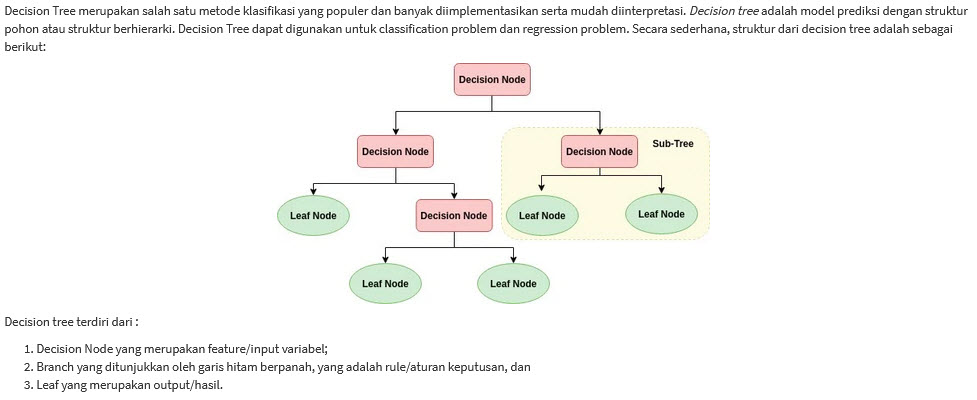

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Call the classifier
decision_tree = DecisionTreeClassifier()
# Fit the classifier to the training data
decision_tree = decision_tree.fit(X_train, y_train)

# evaluating the decision_tree performance
print('Training Accuracy :', decision_tree.score(X_train,y_train))
print('Testing Accuracy :', decision_tree.score(X_test,y_test))

Training Accuracy : 1.0
Testing Accuracy : 0.8599621519329549


# Linear Regression

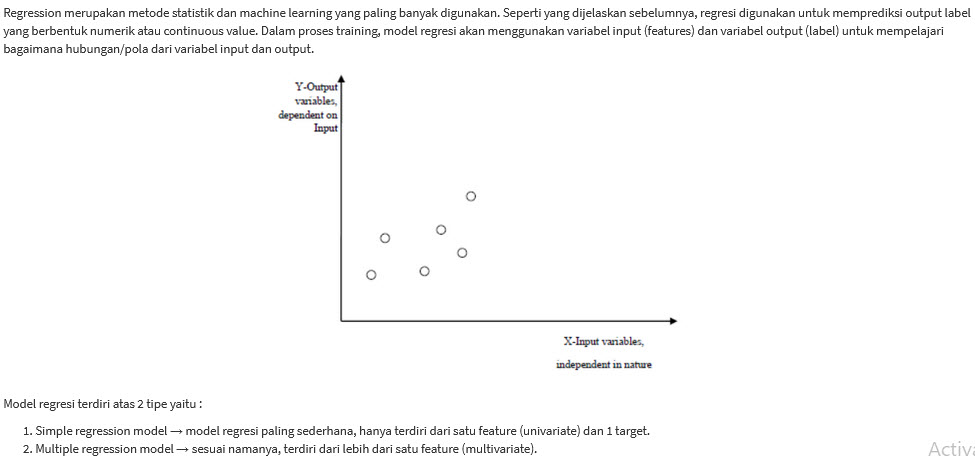

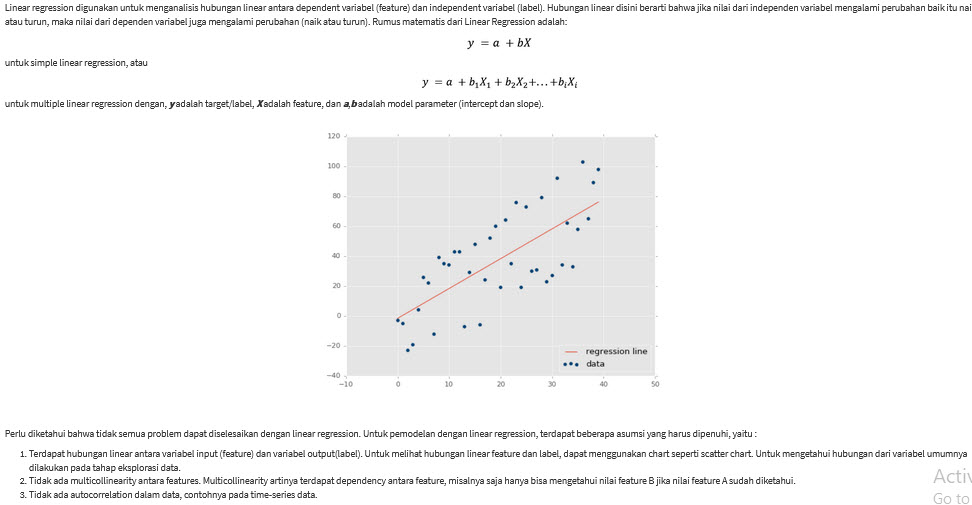

### untuk linear regression target/label harus berupa numerik

In [19]:
#load dataset
import pandas as pd
housing = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/housing_boston.csv')
#Data rescaling
from sklearn import preprocessing
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
housing[['RM','LSTAT','PTRATIO','MEDV']] = data_scaler.fit_transform(housing[['RM','LSTAT','PTRATIO','MEDV']])
# getting dependent and independent variables
X = housing.drop(['MEDV'], axis = 1)
y = housing['MEDV']
# checking the shapes
print('Shape of X:', X.shape)
print('Shape of y:', y.shape)

# splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
# checking the shapes  
print('Shape of X_train :', X_train.shape)
print('Shape of y_train :', y_train.shape)
print('Shape of X_test :', X_test.shape)
print('Shape of y_test :', y_test.shape)

##import regressor from Scikit-Learn
from  sklearn.linear_model import LinearRegression 
# Call the regressor
reg = LinearRegression()
# Fit the regressor to the training data  
reg = reg.fit(X_train, y_train)
# Apply the regressor/model to the test data  
y_pred = reg.predict(X_test)

C:\Users\201802050007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


Shape of X: (489, 3)
Shape of y: (489,)
Shape of X_train : (342, 3)
Shape of y_train : (342,)
Shape of X_test : (147, 3)
Shape of y_test : (147,)


# Regression Performance Evaluation

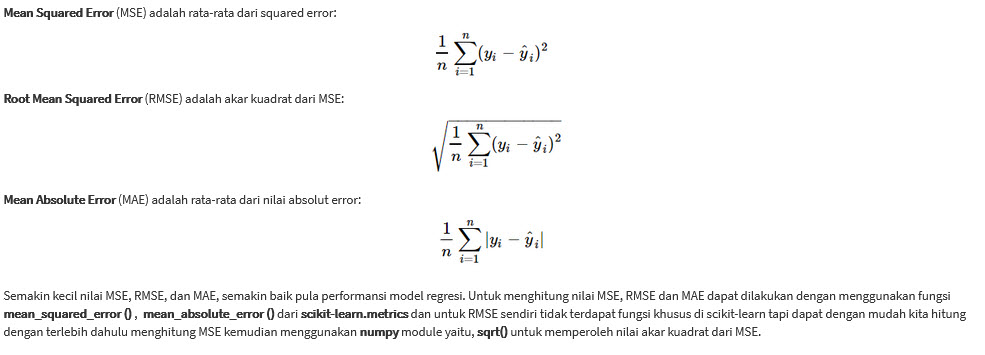

Mean squared error of testing set: 0.010913024655841009
Mean absolute error of testing set: 0.07789896103120689
Root Mean Squared Error of testing set: 0.1044654232549747


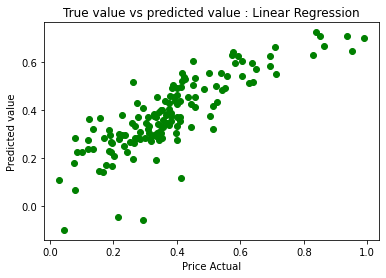

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error  
import numpy as np
import matplotlib.pyplot as plt 

#Calculating MSE, lower the value better it is. 0 means perfect prediction
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error of testing set:', mse)
#Calculating MAE
mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error of testing set:', mae)
#Calculating RMSE
rmse = np.sqrt(mse)
print('Root Mean Squared Error of testing set:', rmse)

#Plotting y_test dan y_pred
plt.scatter(y_test, y_pred, c = 'green')
plt.xlabel('Price Actual')
plt.ylabel('Predicted value')
plt.title('True value vs predicted value : Linear Regression')
plt.show()

# Unsupervised Learning
## K-Means Clustering
### K-Means merupakan tipe clustering dengan centroid based (titik pusat). Artinya kesamaan dari objek/sampel dihitung dari seberapa dekat objek itu dengan centroid atau titik pusat.

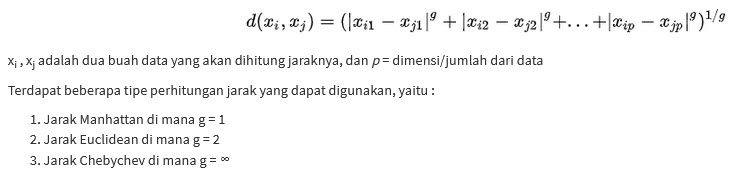
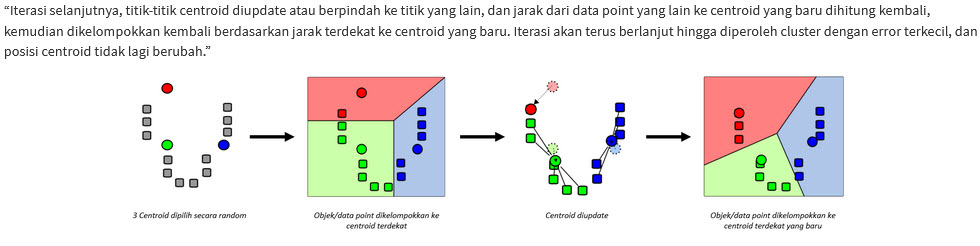


In [21]:
#import library
import pandas as pd  
from sklearn.cluster import KMeans

#load dataset
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/mall_customers.csv')

#selecting features  
X = dataset[['annual_income','spending_score']]  

#Define KMeans as cluster_model  
cluster_model = KMeans(n_clusters = 5, random_state = 24)  
labels = cluster_model.fit_predict(X)

In [22]:
cluster_model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=24, tol=0.0001, verbose=0)

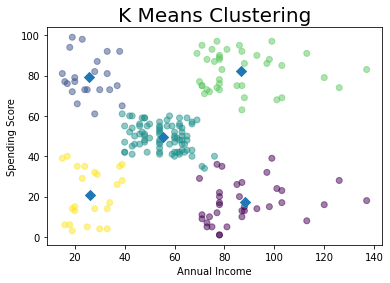

In [23]:
#import library
import matplotlib.pyplot as plt

#convert dataframe to array
X = X.values
#Separate X to xs and ys --> use for chart axis
xs = X[:,0]
ys = X[:,1]
# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys,c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = cluster_model.cluster_centers_
# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D', s=50)
plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [24]:
centroids

array([[88.2       , 17.11428571],
       [25.72727273, 79.36363636],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [26.30434783, 20.91304348]])

# Measuring Cluster Criteria
###  “Clustering yang baik adalah cluster yang data point-nya saling rapat/sangat berdekatan satu sama lain dan cukup berjauhan dengan objek/data point di cluster yang lain. Jadi, objek dalam satu cluster tidak tersebut berjauhan. Nah, untuk mengukur kualitas dari clustering, kita bisa menggunakan inertia,”
### “Inertia sendiri mengukur seberapa besar penyebaran object/data point data dalam satu cluster, semakin kecil nilai inertia maka semakin baik. Kita tidak perlu bersusah payah menghitung nilai inertia karena secara otomatis, telah dihitung oleh KMeans( ) ketika algorithm di fit ke dataset. Untuk mengecek nilai inertia cukup dengan print fungsi .inertia_ dari model yang sudah di fit ke dataset.”
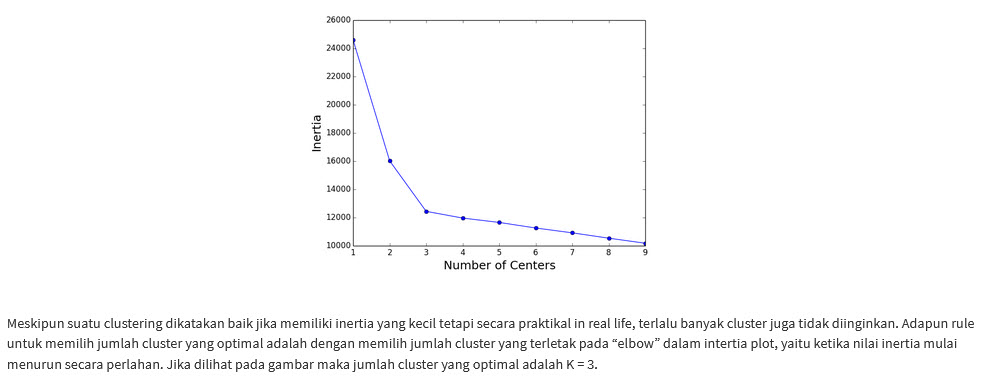

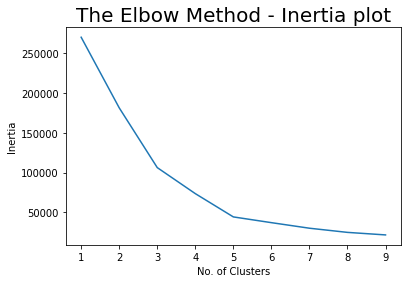

In [25]:
#import library
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)
    
##Inertia plot
plt.plot(range(1, 10), inertia)
plt.title('The Elbow Method - Inertia plot', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.show()

# Tugas Praktek

In [26]:
#import library 
import pandas as pd

# Baca data 'ecommerce_banner_promo.csv'
data = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/pythonTutorial/ecommerce_banner_promo.csv')

#1. Data eksplorasi dengan head(), info(), describe(), shape
print("\n[1] Data eksplorasi dengan head(), info(), describe(), shape")
print("Lima data teratas:")
print(data.head())
print("Informasi dataset:")
print(data.info())
print("Statistik deskriptif dataset:")
print(data.describe())
print("Ukuran dataset:")
print(data.shape)


[1] Data eksplorasi dengan head(), info(), describe(), shape
Lima data teratas:
   Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

         Timestamp  Cli

In [27]:
#2. Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
print("\n[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()")
print(data.corr())

#3. Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()
print("\n[3] Data eksplorasi dengan mengecek distribusi label menggunakan fungsi groupby() dan size()")
print(data.groupby('Clicked on Ad').size())


[2] Data eksplorasi dengan dengan mengecek korelasi dari setiap feature menggunakan fungsi corr()
                          Daily Time Spent on Site       Age  Area Income  \
Daily Time Spent on Site                  1.000000 -0.331513     0.310954   
Age                                      -0.331513  1.000000    -0.182605   
Area Income                               0.310954 -0.182605     1.000000   
Daily Internet Usage                      0.518658 -0.367209     0.337496   
Male                                     -0.018951 -0.021044     0.001322   
Clicked on Ad                            -0.748117  0.492531    -0.476255   

                          Daily Internet Usage      Male  Clicked on Ad  
Daily Time Spent on Site              0.518658 -0.018951      -0.748117  
Age                                  -0.367209 -0.021044       0.492531  
Area Income                           0.337496  0.001322      -0.476255  
Daily Internet Usage                  1.000000  0.028012      -0.

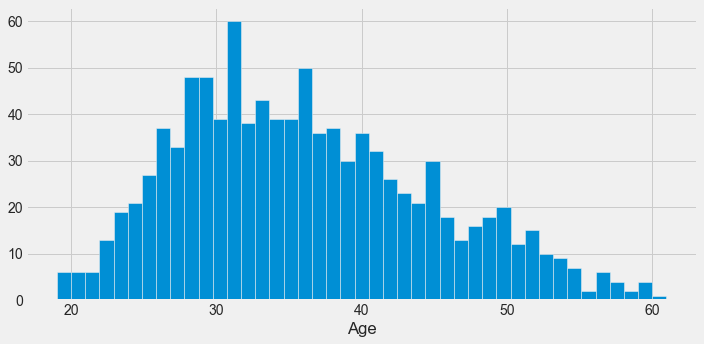

<Figure size 432x288 with 0 Axes>

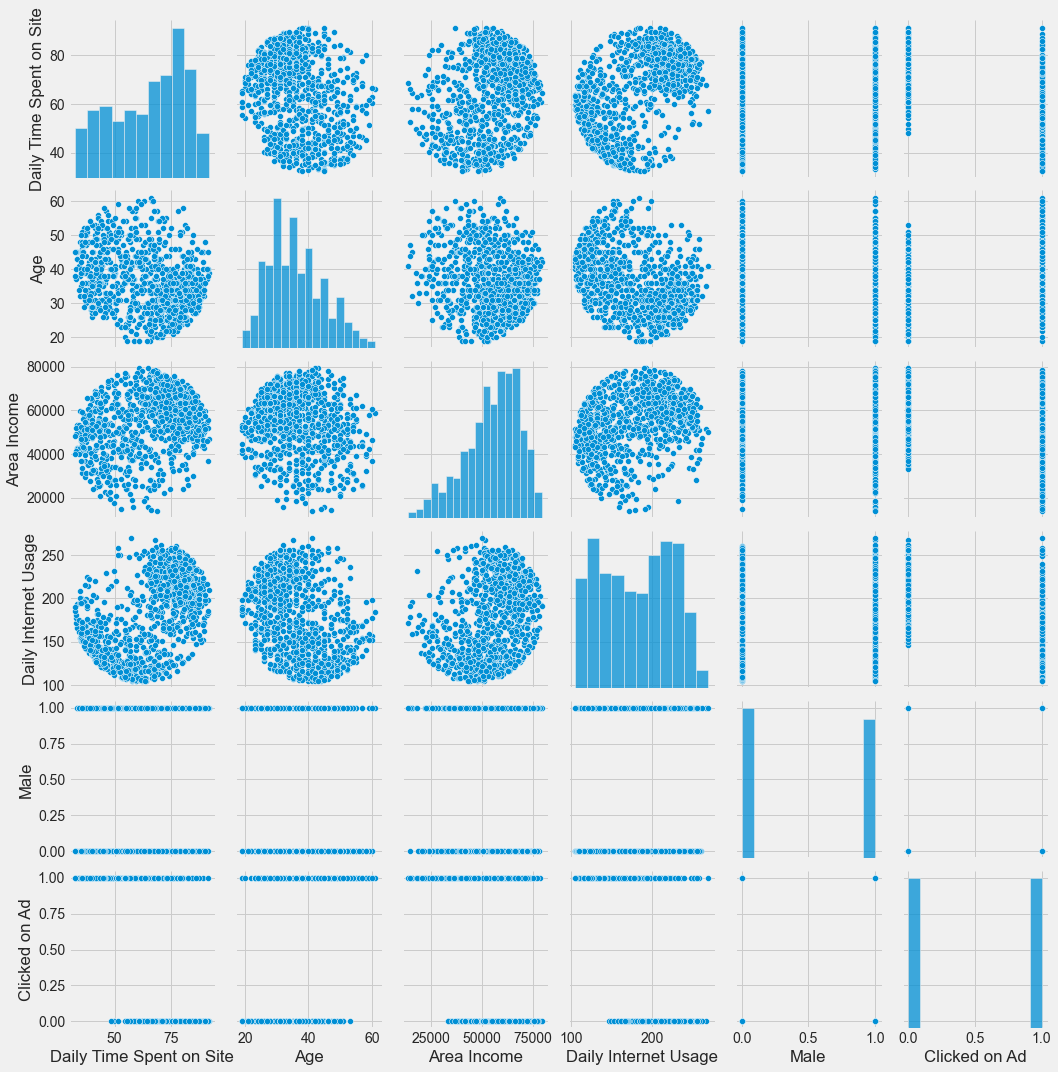

In [28]:
#import library
import matplotlib.pyplot as plt
import seaborn as sns

# Seting: matplotlib and seaborn
sns.set_style('whitegrid')  
plt.style.use('fivethirtyeight')

#4. Data eksplorasi dengan visualisasi
#4a. Visualisasi Jumlah user dibagi ke dalam rentang usia (Age) menggunakan histogram (hist()) plot
plt.figure(figsize=(10, 5))
plt.hist(data['Age'], bins = data.Age.nunique())
plt.xlabel('Age')
plt.tight_layout()
plt.show()

#4b. Gunakan pairplot() dari seaborn (sns) modul untuk menggambarkan hubungan setiap feature.
plt.figure()
sns.pairplot(data)
plt.show()

In [29]:
#5. Cek missing value
print("\n[5] Cek missing value")
print(data.isnull().sum().sum())


[5] Cek missing value
0


In [30]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#6.Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing
print("\n[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing")
#6a.Drop Non-Numerical (object type) feature from X, as Logistic Regression can only take numbers, and also drop Target/label, assign Target Variable to y.
X = data.drop(['Ad Topic Line','City','Country','Timestamp','Clicked on Ad'], axis = 1)
y = data['Clicked on Ad']

#6b. splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

#6c. Modelling
# Call the classifier
logreg = LogisticRegression()
# Fit the classifier to the training data
logreg = logreg.fit(X_train,y_train)
# Prediksi model
y_pred = logreg.predict(X_test)

#6d. Evaluasi Model Performance
print("Evaluasi Model Performance:")
print("Training Accuracy :", logreg.score(X_train, y_train))
print("Testing Accuracy :", logreg.score(X_test, y_test))


[6] Lakukan pemodelan dengan Logistic Regression, gunakan perbandingan 80:20 untuk training vs testing
Evaluasi Model Performance:
Training Accuracy : 0.9
Testing Accuracy : 0.9


C:\Users\201802050007\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [31]:
# Import library
from sklearn.metrics import confusion_matrix, classification_report

#7. Print Confusion matrix dan classification report
print("\n[7] Print Confusion matrix dan classification report")

#apply confusion_matrix function to y_test and y_pred
print("Confusion matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

#apply classification_report function to y_test and y_pred
print("Classification report:")
cr = classification_report(y_test, y_pred)
print(cr)


[7] Print Confusion matrix dan classification report
Confusion matrix:
[[86  3]
 [17 94]]
Classification report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.90        89
           1       0.97      0.85      0.90       111

   micro avg       0.90      0.90      0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200

